# Bibliotecas

In [1]:
import re
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

import pandas_profiling

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

# Cleaning/Exploratória

In [2]:
df1 = pd.read_csv(r'C:\Users\Carol\Documents\IronHack\data.submissions\Projetos\Projeto final\Dataset\googleplaystore.csv')
df2 = pd.read_csv(r'C:\Users\Carol\Documents\IronHack\data.submissions\Projetos\Projeto final\Dataset\googleplaystore_user_reviews.csv')

In [3]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [216]:
df1['Category'].value_counts()

FAMILY                 1902
GAME                    926
TOOLS                   827
BUSINESS                419
MEDICAL                 396
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
ENTERTAINMENT            79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           60
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [4]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
df1.shape

(10841, 13)

In [6]:
df2.shape

(64295, 5)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())

In [10]:
df1.dropna(inplace = True)

In [11]:
df2.dropna(inplace = True)

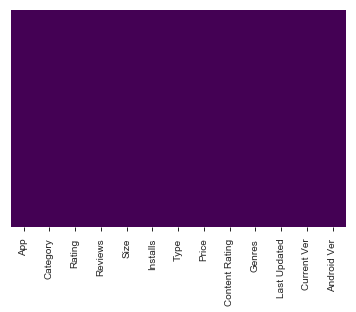

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

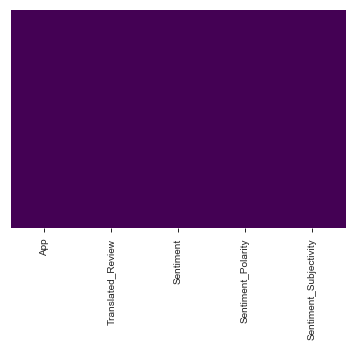

In [13]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df1['Current Ver'] = df1['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df1['Current Ver'] = df1['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df1['Current Ver'] = df1['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df1['Current Ver'] = df1['Current Ver'].fillna(df1['Current Ver'].median())


In [15]:
i = df1[df1['Category'] == '1.9'].index
df1.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
df1 = df1.drop(i)

In [17]:
df1 = df1[pd.notnull(df1['Last Updated'])]
df1 = df1[pd.notnull(df1['Content Rating'])]

In [18]:
df1['Installs'] = df1['Installs'].str.replace('+','')

In [19]:
df1.shape

(10829, 13)

In [20]:
df2.shape

(37427, 5)

In [21]:
df1.drop_duplicates(['App'], keep='last', inplace = True)

In [22]:
df1[df1['App'] == 'Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000",Free,0,Teen,Social,"August 3, 2018",0.0,Varies with device


In [23]:
df1.shape

(9648, 13)

In [24]:
df1['App'].count()

9648

In [25]:
pandas_profiling.ProfileReport(df1)

# Graficos

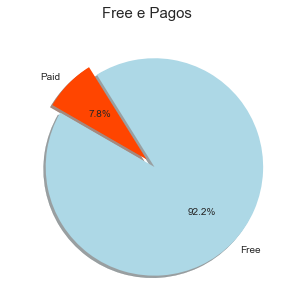

<Figure size 360x360 with 0 Axes>

In [26]:
from pylab import rcParams
labels =df1['Type'].value_counts(sort = True).index
sizes = df1['Type'].value_counts(sort = True)


colors = ["lightblue","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Free e Pagos', size = 15)
plt.show()
plt.savefig('free.png')

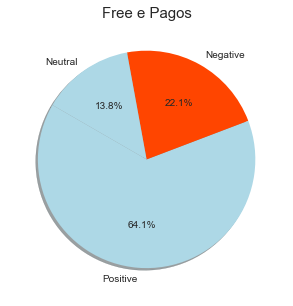

<Figure size 360x360 with 0 Axes>

In [27]:
from pylab import rcParams
labels =df2['Sentiment'].value_counts(sort = True).index
sizes = df2['Sentiment'].value_counts(sort = True)


colors = ["lightblue","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Free e Pagos', size = 15)
plt.show()
plt.savefig('free.png')

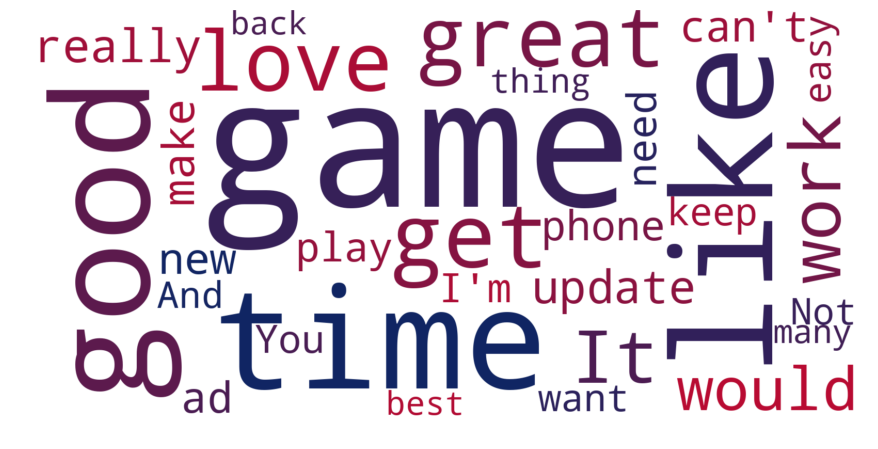

<Figure size 360x360 with 0 Axes>

In [28]:
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud1 = WordCloud(stopwords = ['way','even', 'much', 'ad', 'please', 'thi', 'can', 'But','also','it','the','It','app','This'],max_font_size=350, collocations=False, max_words=30, width=1600, height=800, background_color="white",colormap=cmap).generate(' '.join(df2['Translated_Review']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('cloud.png')

# Regressão Logistica

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
aiai = df2['Sentiment_Polarity']+df2['Sentiment_Subjectivity']

In [30]:
X =  pd.get_dummies(df2.drop(['Sentiment'],axis=1), drop_first=True)

In [37]:
y = df2['Sentiment']

In [38]:
X.shape

(37427, 28859)

In [39]:
y.shape

(37427,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

## Treinando e predizendo (?)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98      2456
     Neutral       0.96      0.88      0.92      1539
    Positive       0.98      0.99      0.99      7234

   micro avg       0.98      0.98      0.98     11229
   macro avg       0.97      0.95      0.96     11229
weighted avg       0.98      0.98      0.98     11229



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
print(confusion_matrix(y_test,predictions))

[[2401   32   23]
 [  47 1361  131]
 [  12   26 7196]]
